# Reading the dataset

In [ ]:
# Importing the required library
import pandas as pd

In [ ]:
# Reading the dataset
# data = pd.read_csv('diabetes.csv')
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/diabetes.csv')

In [ ]:
# Checking top 5 rows of dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Checking the shape of the dataset
data.shape

(768, 9)

# Defining input and output features

In [ ]:
# Defining input (X) and output (y) features
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
# Checking the shape of input-output features
X.shape, y.shape

((768, 8), (768,))

In [ ]:
# Creating training and test patterns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1302, shuffle=True, random_state = 0)

In [ ]:
# Checking shape of training and test sets
X_train.shape, X_test.shape

((668, 8), (100, 8))

In [ ]:
# Checking the input training patterns
print(X_train)

[[  0.    114.     80.    ...  44.2     0.167  27.   ]
 [  2.     99.     52.    ...  24.6     0.637  21.   ]
 [  4.    110.     92.    ...  37.6     0.191  30.   ]
 ...
 [  4.     94.     65.    ...  24.7     0.148  21.   ]
 [ 11.     85.     74.    ...  30.1     0.3    35.   ]
 [  5.    136.     82.    ...   0.      0.64   69.   ]]


In [ ]:
# Feature scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Checking the scaled input training patterns
print(X_train)

[[-1.13588314 -0.21193895  0.55681936 ...  1.54210011 -0.90862605
  -0.53625609]
 [-0.54837254 -0.68851622 -0.88387082 ... -0.94627272  0.51775652
  -1.03949056]
 [ 0.03913806 -0.33902622  1.17425801 ...  0.70417864 -0.83578949
  -0.28463886]
 ...
 [ 0.03913806 -0.84737531 -0.21497895 ... -0.93357694 -0.96628832
  -1.03949056]
 [ 2.09542514 -1.13332166  0.24810004 ... -0.24800483 -0.50499013
   0.1347232 ]
 [ 0.33289335  0.48704104  0.6597258  ... -4.06943453  0.52686109
   2.98638518]]


# Defining a training logistic regression model

In [ ]:
# Defining a logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_rgr = LogisticRegression(random_state = 0)

In [ ]:
# Training the logistic regression classifier
logistic_rgr.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predictions and evaluations

In [ ]:
# Making predictions with the test data
y_pred = logistic_rgr.predict(X_test)

In [ ]:
# Combining the predicted and actual values
pd.DataFrame(data={'Predicted Labels': y_pred, 'Actual Labels': y_test})

,Predicted Labels,Actual Labels
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
95,0,0
96,0,1
97,0,0
98,1,1


In [ ]:
# Confusuion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[64  5]
 [10 21]]


In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.85

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        69
           1       0.81      0.68      0.74        31

    accuracy                           0.85       100
   macro avg       0.84      0.80      0.82       100
weighted avg       0.85      0.85      0.85       100



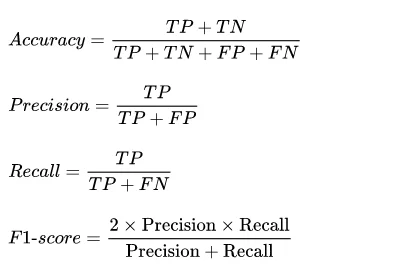